In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import random as rd
import array
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [16]:
dataTable = pd.read_csv('cardio_train.csv', delimiter=';').drop('id', 1)

In [3]:
dataTable.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### 1.0 Cleaning Dataset

In [4]:
def ageInYears(dataTable):
    ageInYears = []
    for i in range(len(dataTable)):
        ageInYears.append(int(round(dataTable.iloc[i]['age']/365)))
    return ageInYears

In [5]:
ageInYears = ageInYears(dataTable)
dataTable['age_years'] = ageInYears

In [6]:
cols = dataTable.columns.tolist()
cols.insert(0, cols.pop(cols.index('age_years')))
dataTable = dataTable.reindex(columns= cols)
del dataTable['age']
dataTable.columns = ['Age_years', 'Gender', 'Height', 'Weight', 'Systolic_bp', 'Diastolic_bp', 'Cholesterol', 'Glucose', 'Smoking', 'Alcohol_intake', 'Physical_activity', 'Cardio_disease' ]

In [7]:
dataTable.head()

,Age_years,Gender,Height,Weight,Systolic_bp,Diastolic_bp,Cholesterol,Glucose,Smoking,Alcohol_intake,Physical_activity,Cardio_disease
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


### 2.0 Algorithms

In [8]:
atributes = dataTable.values[:,:-1]
classes = dataTable.values[:,-1]
xTrain, xTest, yTrain, yTest = train_test_split(atributes, classes, test_size = 0.25)

### 2.1 KNN

In [9]:
def matriz_covariance(x1, x2):
    return 1

def euclidean_distance(testRow, trainRow):
    distance = 0.0
    for i in range(len(testRow)):
        distance += (testRow[i] - trainRow[i])**2
    return sqrt(distance)

def get_neighbors(train, yTrain, testRow, num_neighbors):
    distances = list()
    for i in range(train.shape[0]):
        dist = euclidean_distance(testRow, train[i])
        distances.append((train[i], dist, yTrain[i]))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append((distances[i][0], distances[i][2]))
    return neighbors

def predict_classification(train, test, num_neighbors):
    prediction = list()
    for i in range(test.shape[0]):
        neighbors = get_neighbors(train, test.iloc[i], num_neighbors)
        output_values = [row[-1] for row in neighbors]
        prediction.append(max(set(output_values), key=output_values.count))
    return prediction

def knn(xTrain, yTrain, xTest, numNeighbors):
    prediction = list()
    for i in range(len(xTest)):
        neighbors = get_neighbors(xTrain, yTrain, xTest[i], numNeighbors)
        output_values = [row[-1] for row in neighbors]
        prediction.append(max(set(output_values), key=output_values.count))
    return prediction

In [10]:
neighbors = 3
predicted = knn(xTrain, yTrain, xTest, neighbors)

### 2.1.1 KNN Metrics

In [11]:
def accuracy(predicted, actual):
    total = 0;
    for a,p in zip(actual, predicted):
        if (a == p):
            total +=1;
    return (total/len(actual))*100

In [12]:
accuracy(predicted, yTest)

68.8

In [13]:
print(classification_report(yTest, predicted))

              precision    recall  f1-score   support

         0.0       0.66      0.69      0.68       235
         1.0       0.72      0.68      0.70       265

    accuracy                           0.69       500
   macro avg       0.69      0.69      0.69       500
weighted avg       0.69      0.69      0.69       500



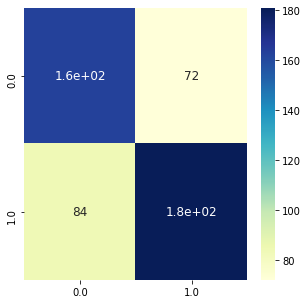

In [14]:
confMatrix = confusion_matrix(yTest, predicted)
confMatrixDF = pd.DataFrame(confMatrix, index = np.unique(yTest), columns = np.unique(yTest))

plt.figure(figsize=(5,5))
sb.heatmap(confMatrixDF, annot=True, annot_kws={"size": 12}, cmap="YlGnBu")

In [15]:
confMatrixDF

,0.0,1.0
0.0,163,72
1.0,84,181
